<a href="https://colab.research.google.com/github/eylons1/open-data/blob/master/%D7%9E%D7%95%D7%93%D7%9C%D7%99%D7%9D_%D7%97%D7%99%D7%A9%D7%95%D7%91%D7%99%D7%99%D7%9D_%D7%A9%D7%9C_%D7%9C%D7%9E%D7%99%D7%93%D7%94_%D7%AA%D7%A8%D7%92%D7%99%D7%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lottery of 10 points around the averages required in the question.

In [ ]:
import numpy as np

def generate_points(mean1, mean2, variance, num_points=10):
    cluster1 = np.random.normal(mean1, variance, (num_points, 2))
    cluster2 = np.random.normal(mean2, variance, (num_points, 2))
    return cluster1, cluster2

mean1 = (3, -3)
mean2 = (-3, 3)
variances = [0.5, 1, 2, 3]
num_points = 10


Implementation of the perceptron algorithm to find a straight line that separates the two clusters.

In [ ]:
def perceptron(X, y, max_steps=1000):
    w = np.zeros(X.shape[1])
    b = 0
    steps = 0
    for _ in range(max_steps):
        error_count = 0
        for xi, target in zip(X, y):
            update = target * (np.dot(xi, w) + b)
            if update <= 0:
                w += target * xi
                b += target
                error_count += 1
        steps += 1
        if error_count == 0:
            break
    return w, b, steps, error_count == 0


In [ ]:
results = {variance: {'success_rate': 0, 'avg_steps': 0} for variance in variances}
num_trials = 100

for variance in variances:
    success_count = 0
    steps_list = []
    for _ in range(num_trials):
        cluster1, cluster2 = generate_points(mean1, mean2, variance, num_points)
        X = np.vstack((cluster1, cluster2))
        y = np.hstack((np.ones(num_points), -np.ones(num_points)))
        w, b, steps, success = perceptron(X, y)
        if success:
            success_count += 1
            steps_list.append(steps)
    results[variance]['success_rate'] = success_count / num_trials
    if steps_list:
        results[variance]['avg_steps'] = np.mean(steps_list)


In [ ]:
print (results)

{0.5: {'success_rate': 1.0, 'avg_steps': 2.0}, 1: {'success_rate': 1.0, 'avg_steps': 2.0}, 2: {'success_rate': 0.94, 'avg_steps': 2.606382978723404}, 3: {'success_rate': 0.5, 'avg_steps': 11.62}}


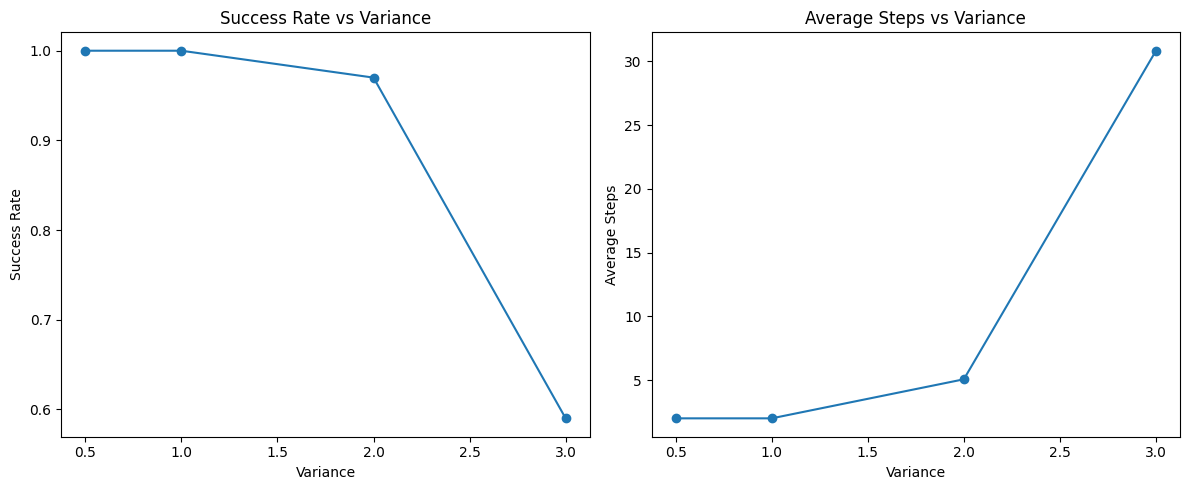

In [ ]:
import matplotlib.pyplot as plt

variances = [0.5, 1, 2, 3]
success_rates = [results[v]['success_rate'] for v in variances]
avg_steps = [results[v]['avg_steps'] for v in variances]

plt.figure(figsize=(12, 5))

# Graph for success rate
plt.subplot(1, 2, 1)
plt.plot(variances, success_rates, marker='o')
plt.xlabel('Variance')
plt.ylabel('Success Rate')
plt.title('Success Rate vs Variance')

# Graph for average steps
plt.subplot(1, 2, 2)
plt.plot(variances, avg_steps, marker='o')
plt.xlabel('Variance')
plt.ylabel('Average Steps')
plt.title('Average Steps vs Variance')

plt.tight_layout()
plt.show()
